# mlX 2.0 Regression Challenge: Predict the Hype

In this competition, your mission is to predict a song’s popularity score (0-100) using real-world music data—from audio features and artist stats to track metadata. Using machine learning, you’ll analyze trends in danceability, energy, valence, and more to train a model that forecasts how listeners will react before a song even hits the charts.

## 1. preparing environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

## 2. Data Loading

In [2]:
import sys
sys.path.append('..')

from src.utils.utils import load_config
from src.data.load_data import load_data

config = load_config('../configs/config.yaml')
train_df, test_df = load_data(config=config)

Loading training data from ../data/raw/train.csv
Loading test data from ../data/raw/test.csv
Train shape: (61609, 62)
Test shape: (41074, 61)


## 3. Initial Data Inspection

===== Train Set Overview =====
Shape: (61609, 62)


,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target
0,76339,0.482850,1.169231,80.018,0.0201,Country Stuff (feat. Jake Owen),1.0,0.789,154586.0,NaN,...,4.0,161853.0,7.0,4.0,NaN,0.607,7.0,0.7250,0.000000,74
1,80006,0.267862,1.321321,147.966,0.3340,Solitude,6.0,0.715,46874.0,15.0,...,4.0,155619.0,1.0,4.0,0.843,0.783,4.0,NaN,0.043200,2
2,83501,0.242606,1.285319,142.980,0.1110,BDFFRNT (Saved from Conformity),4.0,NaN,264665.0,7.0,...,4.0,209378.0,6.0,4.0,NaN,0.211,10.0,0.6020,0.000000,35
3,81530,0.426400,1.279435,123.063,0.1960,Headlights (feat. Ilsey),5.0,0.685,209208.0,5.0,...,4.0,219043.0,11.0,4.0,0.702,0.369,NaN,0.8200,0.000335,70
4,60534,0.000000,0.974906,132.722,0.0811,Afraid,6.0,0.856,215346.0,5.0,...,4.0,258893.0,1.0,0.0,0.000,0.631,1.0,0.0221,0.000000,78



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61609 entries, 0 to 61608
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          61609 non-null  int64  
 1   emotional_charge_2          59167 non-null  float64
 2   groove_efficiency_1         61429 non-null  float64
 3   beat_frequency_1            61223 non-null  float64
 4   organic_texture_2           61226 non-null  float64
 5   composition_label_0         58660 non-null  object 
 6   harmonic_scale_1            58304 non-null  float64
 7   intensity_index_0           55638 non-null  float64
 8   duration_ms_0               60320 non-null  float64
 9   album_name_length           52015 non-null  float64
 10  beat_frequency_0            51878 non-null  float64
 11  beat_frequency_2            59843 non-null  float64
 12  artist_count                58348 non-null  float64
 13  composition_label_1     

None


Basic Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,61609.0,NaN,NaN,NaN,51390.780162,29659.344472,1.0,25832.0,51410.0,77069.0,102681.0
emotional_charge_2,59167.0,NaN,NaN,NaN,0.316976,0.212777,0.0,0.143877,0.29106,0.46686,0.976063
groove_efficiency_1,61429.0,NaN,NaN,NaN,1.238856,6.171617,0.0,0.730914,1.004894,1.358251,654.0
beat_frequency_1,61223.0,NaN,NaN,NaN,121.02291,30.467061,0.0,96.138,120.012,141.401,239.983
organic_texture_2,61226.0,NaN,NaN,NaN,0.274748,0.30302,0.0,0.027125,0.141,0.454,0.996
...,...,...,...,...,...,...,...,...,...,...,...
emotional_resonance_0,60063.0,NaN,NaN,NaN,0.458851,0.261196,0.0,0.243,0.449,0.663,1.0
harmonic_scale_2,57142.0,NaN,NaN,NaN,5.288894,3.567118,0.0,2.0,5.0,8.0,11.0
intensity_index_2,60916.0,NaN,NaN,NaN,0.616045,0.230109,0.0,0.477,0.646,0.791,1.0
instrumental_density_0,60900.0,NaN,NaN,NaN,0.148391,0.306915,0.0,0.0,0.000019,0.0246,1.0



Duplicate Rows: 0

Unique Values per Column (Top 10):


id                      61609
organic_immersion_1     24766
organic_immersion_0     23615
duration_consistency    23598
groove_efficiency_1     23496
groove_efficiency_0     23123
organic_immersion_2     23019
track_identifier        22991
composition_label_1     22930
emotional_charge_2      22602
dtype: int64


Missing Values (Top 10):


tempo_volatility          10417
beat_frequency_0           9731
album_name_length          9594
duration_ms_1              9105
creator_collective         8914
harmonic_scale_0           7684
instrumental_density_1     7477
rhythmic_cohesion_0        7183
emotional_charge_0         6104
intensity_index_0          5971
dtype: int64


Missing Value Percentages (Top 10):


tempo_volatility          16.908244
beat_frequency_0          15.794770
album_name_length         15.572400
duration_ms_1             14.778685
creator_collective        14.468665
harmonic_scale_0          12.472204
instrumental_density_1    12.136214
rhythmic_cohesion_0       11.659011
emotional_charge_0         9.907643
intensity_index_0          9.691766
dtype: float64

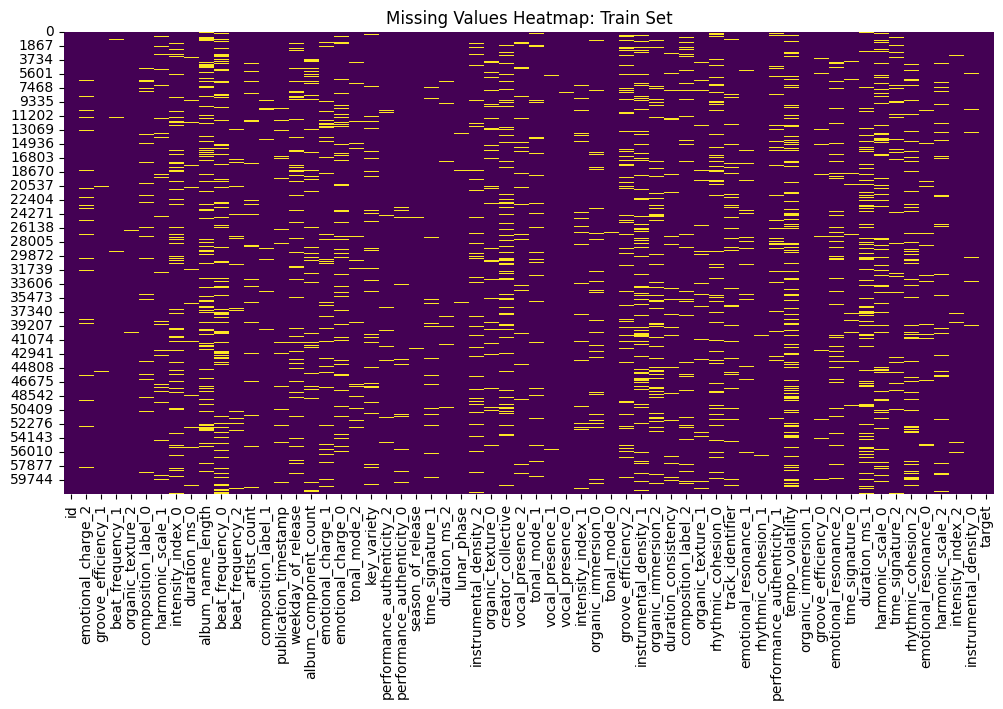

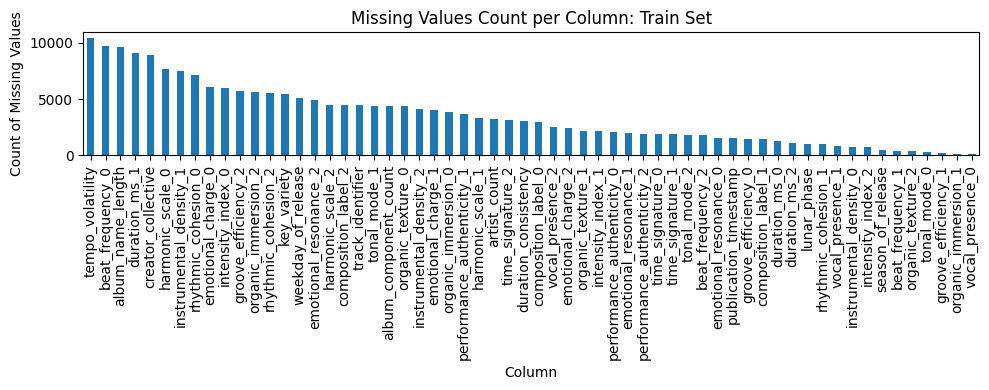

===== Test Set Overview =====
Shape: (41074, 61)


,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,emotional_resonance_2,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0
0,25174,0.600480,1.543590,124.008,0.0729,Dr.Q,1.0,0.763,23032.0,4.0,...,0.834,4.0,253987.0,4.0,4.0,0.604,0.2050,0.0,0.720,0.165000
1,38453,NaN,0.722420,129.942,0.0105,Start A Party,11.0,0.801,215466.0,20.0,...,0.216,4.0,267626.0,5.0,4.0,0.881,0.2610,1.0,0.496,0.000000
2,29013,0.461916,0.757962,83.000,0.2700,Sombras - Live,2.0,0.561,252261.0,44.0,...,0.546,4.0,226626.0,0.0,4.0,0.555,0.0555,0.0,0.846,0.002760
3,57463,0.144236,0.923977,183.991,0.1210,Tennis Court,2.0,NaN,198907.0,23.0,...,0.337,4.0,234286.0,0.0,4.0,0.674,0.4040,7.0,0.428,0.000194
4,51264,0.629832,1.473795,201.277,0.0610,La Cumbia Del Lazo,10.0,0.716,158720.0,NaN,...,0.966,4.0,188520.0,8.0,4.0,0.511,0.9620,10.0,0.652,0.000115



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41074 entries, 0 to 41073
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          41074 non-null  int64  
 1   emotional_charge_2          39477 non-null  float64
 2   groove_efficiency_1         40973 non-null  float64
 3   beat_frequency_1            40795 non-null  float64
 4   organic_texture_2           40846 non-null  float64
 5   composition_label_0         39156 non-null  object 
 6   harmonic_scale_1            38851 non-null  float64
 7   intensity_index_0           37084 non-null  float64
 8   duration_ms_0               40244 non-null  float64
 9   album_name_length           34818 non-null  float64
 10  beat_frequency_0            34617 non-null  float64
 11  beat_frequency_2            39849 non-null  float64
 12  artist_count                38809 non-null  float64
 13  composition_label_1     

None


Basic Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,41074.0,NaN,NaN,NaN,51266.332181,29616.60249,0.0,25441.5,51244.0,76910.0,102682.0
emotional_charge_2,39477.0,NaN,NaN,NaN,0.317621,0.212754,0.0,0.144666,0.291669,0.467372,0.952567
groove_efficiency_1,40973.0,NaN,NaN,NaN,1.361691,10.798167,0.0,0.730178,1.005917,1.356303,1000.0
beat_frequency_1,40795.0,NaN,NaN,NaN,121.188746,30.748513,0.0,96.2285,120.022,141.9645,248.5
organic_texture_2,40846.0,NaN,NaN,NaN,0.273544,0.303162,0.0,0.0274,0.139,0.449,0.996
...,...,...,...,...,...,...,...,...,...,...,...
rhythmic_cohesion_2,37392.0,NaN,NaN,NaN,0.613224,0.178521,0.0,0.506,0.632,0.746,0.978
emotional_resonance_0,40069.0,NaN,NaN,NaN,0.45808,0.260893,0.0,0.242,0.446,0.664,0.998
harmonic_scale_2,38143.0,NaN,NaN,NaN,5.298849,3.572586,0.0,2.0,5.0,8.0,11.0
intensity_index_2,40642.0,NaN,NaN,NaN,0.616424,0.229218,0.0,0.479,0.648,0.79,1.0



Duplicate Rows: 0

Unique Values per Column (Top 10):


id                      41074
organic_immersion_1     18049
groove_efficiency_1     17360
duration_consistency    17241
organic_immersion_0     17211
groove_efficiency_0     17058
composition_label_1     16824
track_identifier        16788
emotional_charge_2      16778
organic_immersion_2     16775
dtype: int64


Missing Values (Top 10):


tempo_volatility          6816
beat_frequency_0          6457
album_name_length         6256
duration_ms_1             6204
creator_collective        6010
harmonic_scale_0          5065
instrumental_density_1    5032
rhythmic_cohesion_0       4753
emotional_charge_0        4108
intensity_index_0         3990
dtype: int64


Missing Value Percentages (Top 10):


tempo_volatility          16.594439
beat_frequency_0          15.720407
album_name_length         15.231046
duration_ms_1             15.104446
creator_collective        14.632127
harmonic_scale_0          12.331402
instrumental_density_1    12.251059
rhythmic_cohesion_0       11.571797
emotional_charge_0        10.001461
intensity_index_0          9.714174
dtype: float64

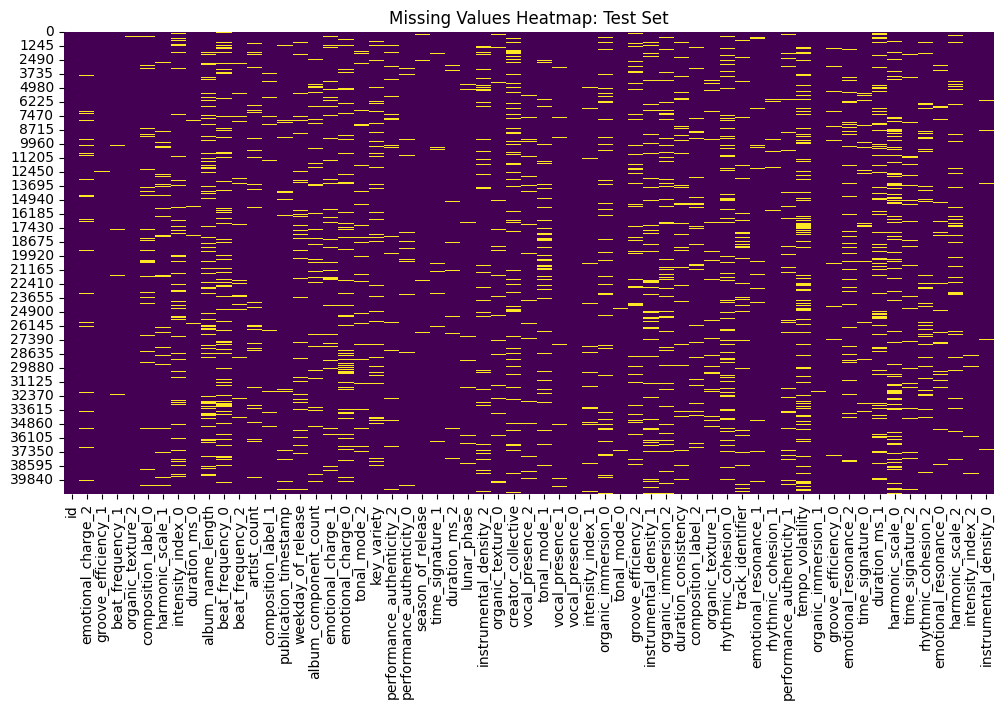

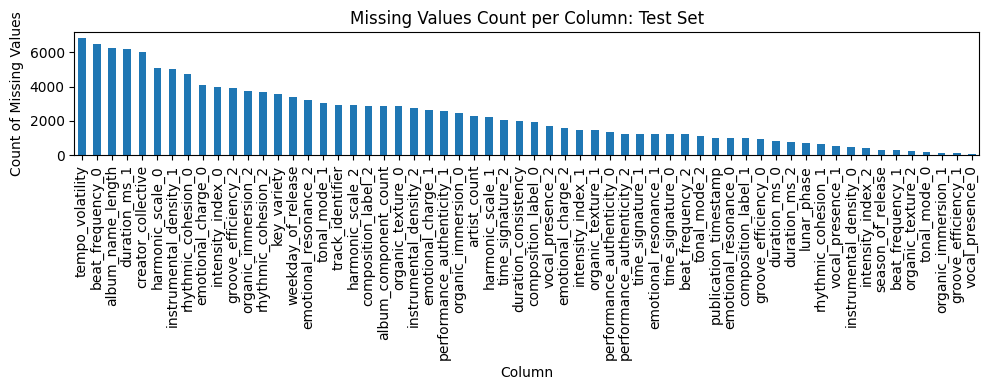

In [3]:
import sys
sys.path.append('..')  

from src.data.data_inspection import initial_data_inspection

initial_data_inspection(train_df, name="Train Set")
initial_data_inspection(test_df, name="Test Set")

## 4. Correlation Matrix

Figure saved to ../outputs/figures\correlation_matrix.png


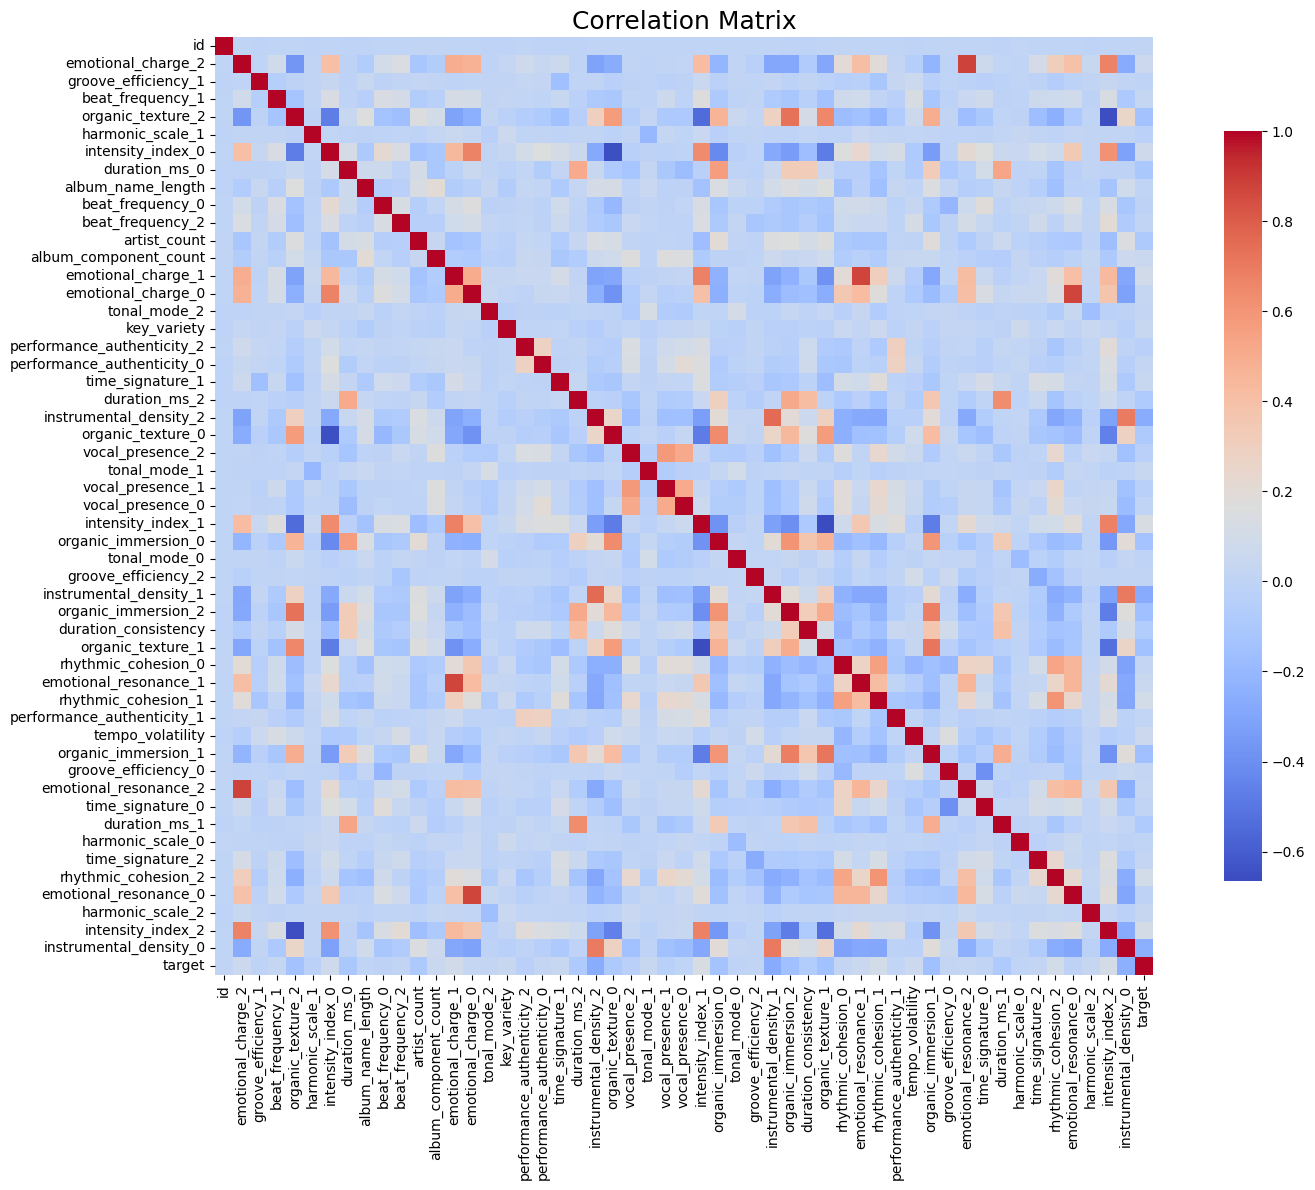

In [5]:
from src.data.visualization import correlation_matrix
from src.utils.utils import load_config

# Load config
config = load_config('../configs/config.yaml')

# Plot and save the correlation matrix for your DataFrame 
correlation_matrix(train_df, config, filename="correlation_matrix.png")